<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/week9/prepare_new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# in this notebook we want to do prepare the new data for propensity score matching. Since now we have last year's data, that is what we are going to use as the baseline behavior, to rule out seasonal effects.

# load data.

In [1]:
ls

drive/  sample_data/


In [2]:
cd drive/

/content/drive


In [3]:
ls

'My Drive'/


In [4]:
cd My\ Drive

/content/drive/My Drive


In [5]:
cd week8

/content/drive/My Drive/week8


In [6]:
ls

 2016_US_County_Level_Presidential_Results.csv
'2020 County Health Rankings Data - Additional Measure Data.csv'
'2020 County Health Rankings Data - Ranked Measure Data.csv'
 check_if_data_is_alright.ipynb
'Copy of agg_social_dist_2.csv'
 county_data_with_covariates.csv
 county_data_with_reduced_covariates.csv
 data_for_propensity.csv
 days_since.csv
 prepare_new_data.ipynb
 propensity_score_matching_new.ipynb
 social_dist_aggregated_on_county.csv
 social_dist_all_trimmed.csv
 social_dist_all_trimmed_new.csv
 social_dist_low_device_count_filtered.csv
 social_dist_reduced.csv
 us_states_governors.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# allows pandas to parse the string in date_range_start column to be a datetime object. 
data = pd.read_csv("social_dist_aggregated_on_county.csv", parse_dates=['date_range_start'],\
                   infer_datetime_format = True)

In [9]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0


In [10]:
data.shape

(1889786, 7)

In [11]:
data.isnull().sum()

date_range_start                0
state                           0
state_code                      0
cnamelong                       0
county_code                     0
device_count                    0
completely_home_device_count    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889786 entries, 0 to 1889785
Data columns (total 7 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   date_range_start              datetime64[ns]
 1   state                         float64       
 2   state_code                    object        
 3   cnamelong                     object        
 4   county_code                   float64       
 5   device_count                  float64       
 6   completely_home_device_count  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 100.9+ MB


In [13]:
small_data = data[data['county_code'] == 66010]

In [14]:
small_data

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count
3141,2019-01-01,66.0,GU,Guam,66010.0,3006.0,1560.0
6367,2019-01-02,66.0,GU,Guam,66010.0,2904.0,1399.0
9593,2019-01-03,66.0,GU,Guam,66010.0,2925.0,1416.0
12819,2019-01-04,66.0,GU,Guam,66010.0,3364.0,1468.0
16045,2019-01-05,66.0,GU,Guam,66010.0,3383.0,1650.0
...,...,...,...,...,...,...,...
1876798,2020-08-04,66.0,GU,Guam,66010.0,4712.0,1256.0
1880023,2020-08-05,66.0,GU,Guam,66010.0,4750.0,1413.0
1883249,2020-08-06,66.0,GU,Guam,66010.0,4882.0,1527.0
1886475,2020-08-07,66.0,GU,Guam,66010.0,4703.0,1202.0


In [15]:
small_data['percentage'] = small_data['completely_home_device_count'] / small_data['device_count']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
small_data

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,percentage
3141,2019-01-01,66.0,GU,Guam,66010.0,3006.0,1560.0,0.518962
6367,2019-01-02,66.0,GU,Guam,66010.0,2904.0,1399.0,0.481749
9593,2019-01-03,66.0,GU,Guam,66010.0,2925.0,1416.0,0.484103
12819,2019-01-04,66.0,GU,Guam,66010.0,3364.0,1468.0,0.436385
16045,2019-01-05,66.0,GU,Guam,66010.0,3383.0,1650.0,0.487733
...,...,...,...,...,...,...,...,...
1876798,2020-08-04,66.0,GU,Guam,66010.0,4712.0,1256.0,0.266553
1880023,2020-08-05,66.0,GU,Guam,66010.0,4750.0,1413.0,0.297474
1883249,2020-08-06,66.0,GU,Guam,66010.0,4882.0,1527.0,0.312782
1886475,2020-08-07,66.0,GU,Guam,66010.0,4703.0,1202.0,0.255582


# visualzie the time series of % stay at home behaviors from 2019-01-01 to 2020-08-08

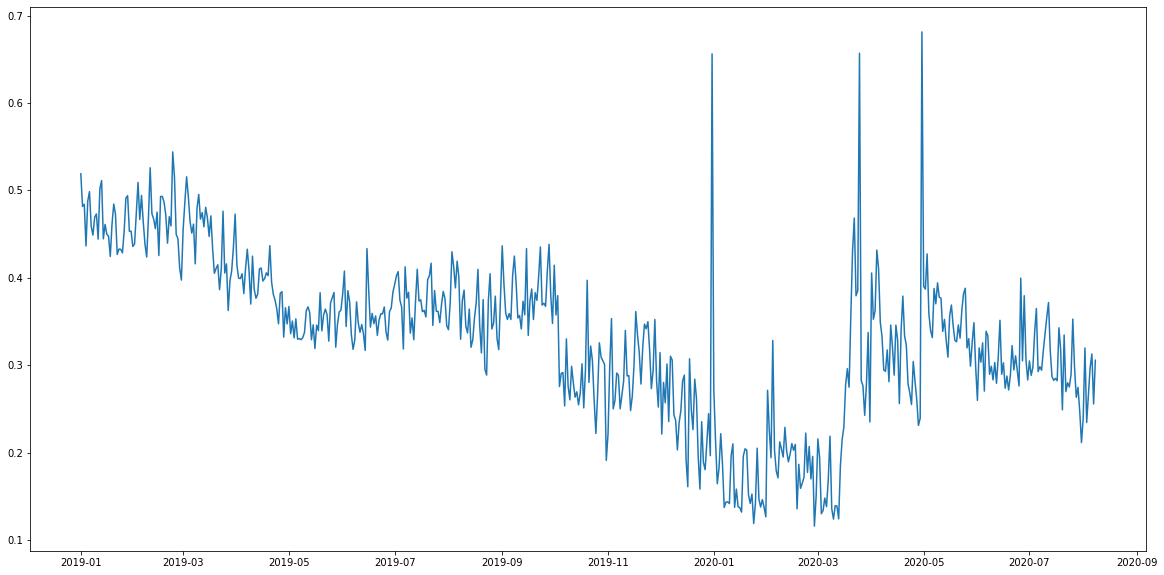

In [17]:
plt.figure(figsize= (20,10))
plt.plot(small_data['date_range_start'], small_data['percentage'])

In [18]:
def plot_time_series_of_county(county_code):
  small_data = data[data['county_code'] == county_code]
  small_data['percentage'] = small_data['completely_home_device_count'] / small_data['device_count']
  plt.figure(figsize= (20,10))
  plt.plot(small_data['date_range_start'], small_data['percentage'])
  plt.ylabel('completely stay at home device %')
  county_name = small_data.iloc[0]['cnamelong']
  state_name = small_data.iloc[0]['state_code']
  plt.title(f'time series of completely stay at home device % in {county_name} in {state_name}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


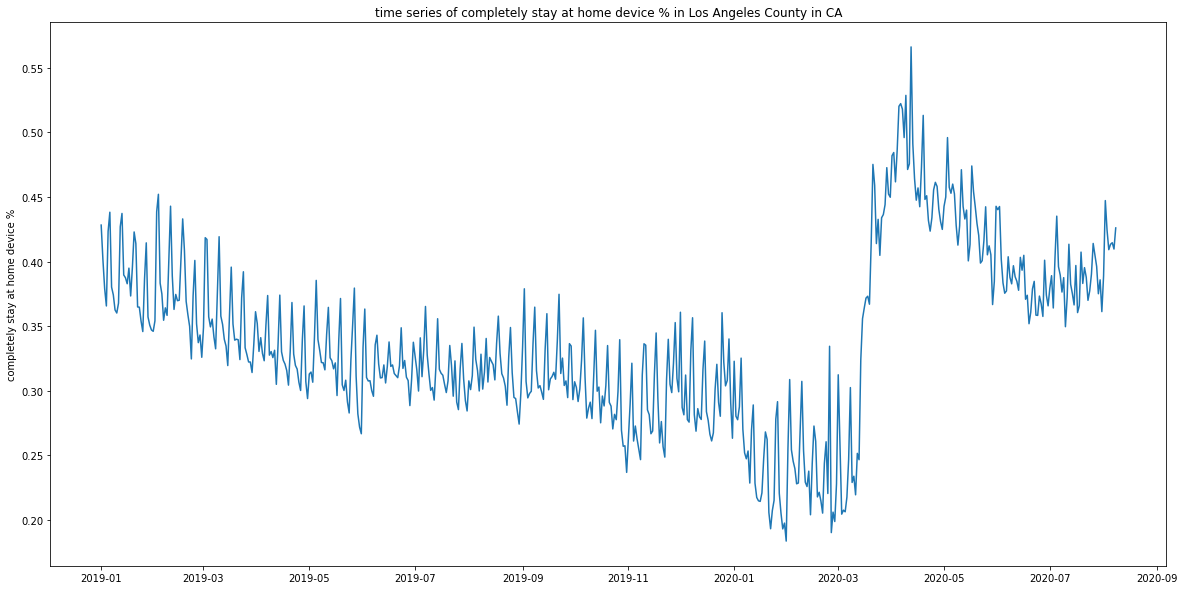

In [19]:
# plot time series of LA county
plot_time_series_of_county(6037)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


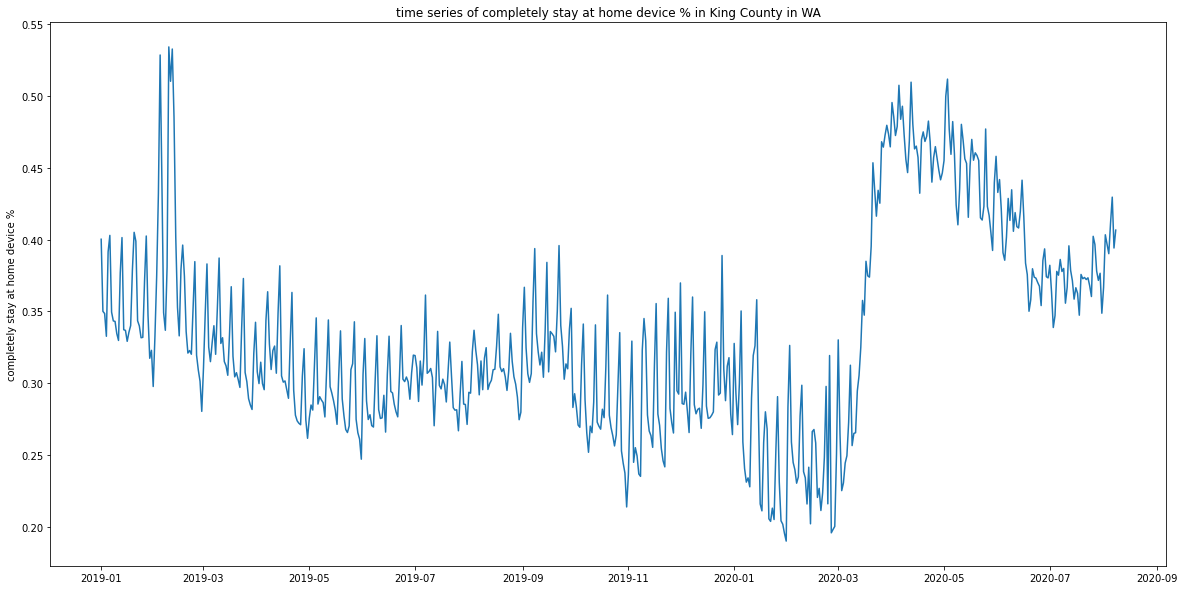

In [20]:
# plot time series of King county in WA
plot_time_series_of_county(53033)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


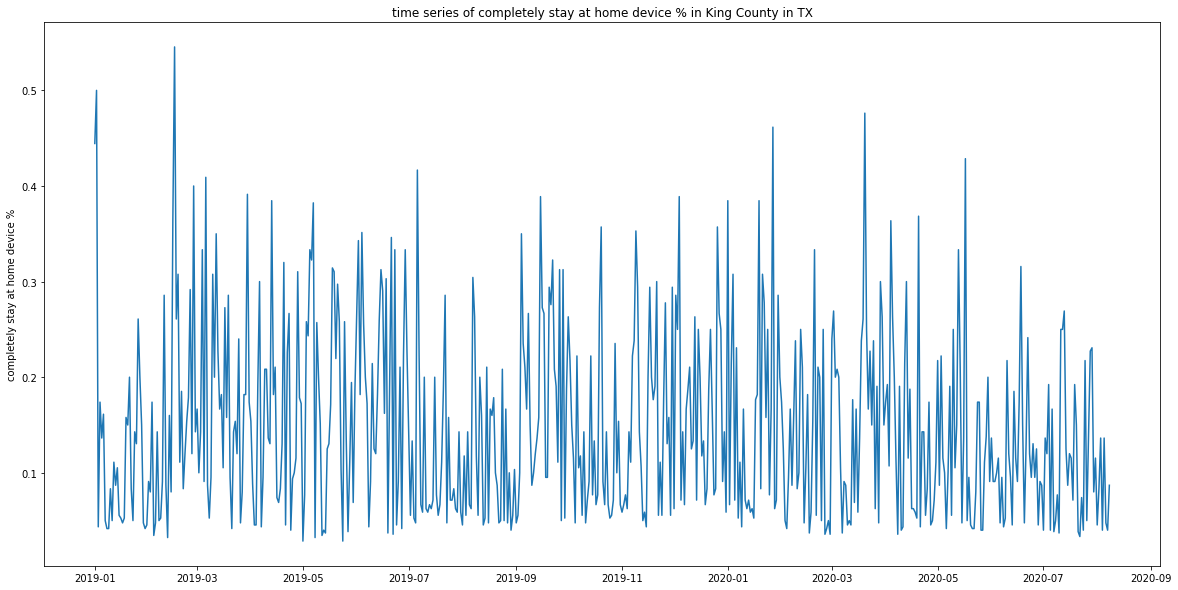

In [ ]:
# king county in texas
plot_time_series_of_county(48269)

We can see that some counties like LA and King county in Washington have major shift in completely stay at home behavior since 2020 March, although it lowers after a while. - people want to go out more after May or June, even though virus is still there.

# take out the rows with very low device counts

In [ ]:
data_with_device_count_greater_than_200 = data[data['device_count'] > 200]

In [ ]:
data_with_device_count_greater_than_200.shape

(1770124, 7)

In [ ]:
difference = data.shape[0] - data_with_device_count_greater_than_200.shape[0] 
print(f'There are {difference} counties/rows that have less than 200 devices')

There are 119662 counties/rows that have less than 200 devices


In [ ]:
data_with_device_count_greater_than_200.to_csv("social_dist_low_device_count_filtered.csv", \
                                               index = False)

# combine social distance data with first case date and shelter in place date data

In [7]:
data = pd.read_csv("social_dist_low_device_count_filtered.csv", parse_dates=['date_range_start'],\
                   infer_datetime_format = True)

In [8]:
data.shape

(1770124, 7)

In [9]:
data.dtypes

date_range_start                datetime64[ns]
state                                  float64
state_code                              object
cnamelong                               object
county_code                            float64
device_count                           float64
completely_home_device_count           float64
dtype: object

In [10]:
days_since = pd.read_csv("days_since.csv", parse_dates=['Date - first case', 'Date - shelter in place'],\
                         infer_datetime_format = True)

In [11]:
days_since.shape

(3234, 12)

In [65]:
days_since.head()

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
0,0,2020-03-24,2020-04-07,2020-04-30,2020-04-04,2020-04-30,Autauga County,1.0,1001.0,1.0,AL,Alabama
1,1,2020-03-15,2020-03-29,2020-04-30,2020-04-04,2020-04-30,Baldwin County,3.0,1003.0,1.0,AL,Alabama
2,2,2020-04-03,2020-04-29,2020-04-30,2020-04-04,2020-04-30,Barbour County,5.0,1005.0,1.0,AL,Alabama
3,3,2020-03-30,2020-05-08,2020-04-30,2020-04-04,2020-04-30,Bibb County,7.0,1007.0,1.0,AL,Alabama
4,4,2020-03-25,2020-05-17,2020-04-30,2020-04-04,2020-04-30,Blount County,9.0,1009.0,1.0,AL,Alabama


In [12]:
days_since.dtypes

Unnamed: 0                               int64
Date - first case               datetime64[ns]
Date - first death                      object
Date - reopening                        object
Date - shelter in place         datetime64[ns]
Date - shelter in place ends            object
cnamelong                               object
county                                 float64
county_code                            float64
state                                  float64
state_code                              object
state_name                              object
dtype: object

In [68]:
days_since[days_since['Date - first case'].isnull()]

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
67,67,NaT,NaN,2020-04-24,2020-03-28,2020-04-24,Aleutians East Borough,13.0,2013.0,2.0,AK,Alaska
68,68,NaT,NaN,2020-04-24,2020-03-28,2020-04-24,Aleutians West Census Area,16.0,2016.0,2.0,AK,Alaska
71,71,NaT,NaN,2020-04-24,2020-03-28,2020-04-24,Bristol Bay Borough,60.0,2060.0,2.0,AK,Alaska
72,72,NaT,NaN,2020-04-24,2020-03-28,2020-04-24,Denali Borough,68.0,2068.0,2.0,AK,Alaska
73,73,NaT,NaN,2020-04-24,2020-03-28,2020-04-24,Dillingham Census Area,70.0,2070.0,2.0,AK,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...
3143,3143,NaT,NaN,NaN,NaT,NaN,Eastern District,10.0,60010.0,60.0,AS,American Samoa
3144,3144,NaT,NaN,NaN,NaT,NaN,Manu'a District,20.0,60020.0,60.0,AS,American Samoa
3145,3145,NaT,NaN,NaN,NaT,NaN,Rose Island,30.0,60030.0,60.0,AS,American Samoa
3146,3146,NaT,NaN,NaN,NaT,NaN,Swains Island,40.0,60040.0,60.0,AS,American Samoa


In [69]:
# these are the counties without shelter in place order.
days_since[days_since['Date - shelter in place'].isnull()]

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
111,111,2020-03-30,NaN,NaN,NaT,NaN,Arkansas County,1.0,5001.0,5.0,AR,Arkansas
112,112,2020-03-29,NaN,NaN,NaT,NaN,Ashley County,3.0,5003.0,5.0,AR,Arkansas
113,113,2020-03-28,NaN,NaN,NaT,NaN,Baxter County,5.0,5005.0,5.0,AR,Arkansas
114,114,2020-03-22,NaN,NaN,NaT,NaN,Benton County,7.0,5007.0,5.0,AR,Arkansas
115,115,2020-03-22,NaN,NaN,NaT,NaN,Boone County,9.0,5009.0,5.0,AR,Arkansas
...,...,...,...,...,...,...,...,...,...,...,...,...
3151,3151,2020-03-31,2020-04-01,NaN,NaT,NaN,Saipan Municipality,110.0,69110.0,69.0,MP,Northern Mariana Islands
3152,3152,2020-03-31,2020-04-01,NaN,NaT,NaN,Tinian Municipality,120.0,69120.0,69.0,MP,Northern Mariana Islands
3231,3231,2020-03-16,2020-04-05,NaN,NaT,NaN,St. Croix Island,10.0,78010.0,78.0,VI,Virgin Islands
3232,3232,2020-03-16,2020-04-05,NaN,NaT,NaN,St. John Island,20.0,78020.0,78.0,VI,Virgin Islands


In [13]:
# these are the columns we want to merge with social_dist data.
days_since_data = days_since[['Date - first case', 'Date - shelter in place', 'county_code']]

In [99]:
days_since_data.head()

,Date - first case,Date - shelter in place,county_code
0,2020-03-24,2020-04-04,1001.0
1,2020-03-15,2020-04-04,1003.0
2,2020-04-03,2020-04-04,1005.0
3,2020-03-30,2020-04-04,1007.0
4,2020-03-25,2020-04-04,1009.0


In [72]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0


In [14]:
data = pd.merge(data, days_since_data, how ="left", on="county_code")

In [15]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0,2020-03-24,2020-04-04
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0,2020-03-15,2020-04-04
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0,2020-04-03,2020-04-04
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0,2020-03-30,2020-04-04
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0,2020-03-25,2020-04-04


In [16]:
data.isna().sum()

date_range_start                     0
state                                0
state_code                           0
cnamelong                            0
county_code                          0
device_count                         0
completely_home_device_count         0
Date - first case                53941
Date - shelter in place         253823
dtype: int64

In [17]:
# need to drop the rows that don't have first case since we use
# that as a metric to measure the impact of COVID
data.dropna(subset=['Date - first case'], inplace=True)

In [18]:
data.isna().sum()

date_range_start                     0
state                                0
state_code                           0
cnamelong                            0
county_code                          0
device_count                         0
completely_home_device_count         0
Date - first case                    0
Date - shelter in place         241110
dtype: int64

In [19]:
# these are the counties that didn't implement
# shelter in place order.
data[data['Date - shelter in place'].isnull()]

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
97,2019-01-01,5.0,AR,Arkansas County,5001.0,1347.0,462.0,2020-03-30,NaT
98,2019-01-01,5.0,AR,Ashley County,5003.0,1444.0,484.0,2020-03-29,NaT
99,2019-01-01,5.0,AR,Baxter County,5005.0,2681.0,1291.0,2020-03-28,NaT
100,2019-01-01,5.0,AR,Benton County,5007.0,21550.0,8760.0,2020-03-22,NaT
101,2019-01-01,5.0,AR,Boone County,5009.0,2638.0,1132.0,2020-03-22,NaT
...,...,...,...,...,...,...,...,...,...
1770052,2020-08-08,56.0,WY,Weston County,56045.0,352.0,123.0,2020-05-27,NaT
1770053,2020-08-08,66.0,GU,Guam,66010.0,4757.0,1454.0,2020-03-16,NaT
1770054,2020-08-08,69.0,MP,Saipan Municipality,69110.0,818.0,233.0,2020-03-31,NaT
1770122,2020-08-08,78.0,VI,St. Croix Island,78010.0,1083.0,295.0,2020-03-16,NaT


In [20]:
data.dtypes

date_range_start                datetime64[ns]
state                                  float64
state_code                              object
cnamelong                               object
county_code                            float64
device_count                           float64
completely_home_device_count           float64
Date - first case               datetime64[ns]
Date - shelter in place         datetime64[ns]
dtype: object

# for every county, get all the rows about that county that is from 2020 first case to June 1 and the same window in 2019.

In [21]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0,2020-03-24,2020-04-04
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0,2020-03-15,2020-04-04
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0,2020-04-03,2020-04-04
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0,2020-03-30,2020-04-04
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0,2020-03-25,2020-04-04


In [22]:
from datetime import datetime

In [104]:
data.iloc[0]['date_range_start']

Timestamp('2019-01-01 00:00:00')

In [106]:
data.iloc[0]['Date - first case']

Timestamp('2020-03-24 00:00:00')

In [107]:
data.iloc[0]['date_range_start'] < data.iloc[0]['Date - first case']

True

In [109]:
firstCase = data.iloc[0]['Date - first case']

In [116]:
firstCase.replace(2019)

Timestamp('2019-03-24 00:00:00')

In [23]:
def isThisRowInTimeWindow(row):
  thisDataDate = row['date_range_start']
  thisYearBeginDate = row['Date - first case']
  thisYearEndDate = datetime(2020,6,1,0,0,0)
  
  # replace the year of first case by 2019.
  lastYearBeginDate = thisYearBeginDate.replace(2019)
  lastYearEndDate = datetime(2019,6,1,0,0,0)

  # return true if this row's date is within the window
  return (thisDataDate >= lastYearBeginDate and thisDataDate <= lastYearEndDate) \
    or (thisDataDate >= thisYearBeginDate and thisDataDate <= thisYearEndDate) 

In [118]:
isThisRowInTimeWindow(data.iloc[0])

False

In [123]:
data.iloc[200000]

date_range_start                2019-03-10 00:00:00
state                                             6
state_code                                       CA
cnamelong                              Marin County
county_code                                    6041
device_count                                   9807
completely_home_device_count                   3816
Date - first case               2020-03-10 00:00:00
Date - shelter in place         2020-03-19 00:00:00
Name: 206516, dtype: object

this row should be within the window.

In [131]:
isThisRowInTimeWindow(data.iloc[200000])

True

In [129]:
data[data['Date - shelter in place'].isnull()]

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
97,2019-01-01,5.0,AR,Arkansas County,5001.0,1347.0,462.0,2020-03-30,NaT
98,2019-01-01,5.0,AR,Ashley County,5003.0,1444.0,484.0,2020-03-29,NaT
99,2019-01-01,5.0,AR,Baxter County,5005.0,2681.0,1291.0,2020-03-28,NaT
100,2019-01-01,5.0,AR,Benton County,5007.0,21550.0,8760.0,2020-03-22,NaT
101,2019-01-01,5.0,AR,Boone County,5009.0,2638.0,1132.0,2020-03-22,NaT
...,...,...,...,...,...,...,...,...,...
1770052,2020-08-08,56.0,WY,Weston County,56045.0,352.0,123.0,2020-05-27,NaT
1770053,2020-08-08,66.0,GU,Guam,66010.0,4757.0,1454.0,2020-03-16,NaT
1770054,2020-08-08,69.0,MP,Saipan Municipality,69110.0,818.0,233.0,2020-03-31,NaT
1770122,2020-08-08,78.0,VI,St. Croix Island,78010.0,1083.0,295.0,2020-03-16,NaT


I think our function that recognizes whether a row is within the time window is working. let's apply this function to every row in the data

In [ ]:
data.shape

(1716183, 9)

In [132]:
data['withinTimeWindow'] = data.apply(lambda row: isThisRowInTimeWindow(row) , axis = 1)

ValueError: ignored

Something is wrong? but we don't have any null first case dates. What could be wrong? Let's find out

In [ ]:
for i in range(1716183):
  try:
    isThisRowInTimeWindow(data.iloc[i])
  except:
    print(i)

2032
2690
4957
5616
7883
8541
10805
11462
13724
14381
16650
17307


In [24]:
data.iloc[2032]

date_range_start                2019-01-01 00:00:00
state                                            41
state_code                                       OR
cnamelong                         Washington County
county_code                                   41067
device_count                                  32749
completely_home_device_count                  14319
Date - first case               2020-02-29 00:00:00
Date - shelter in place         2020-03-23 00:00:00
Name: 2099, dtype: object

In [26]:
thisYearBeginDate = data.iloc[2032]['Date - first case']

In [28]:
thisYearBeginDate.replace(2019)

ValueError: ignored

I know what is going on here... 2020-02-29 is a date that is not present in 2019... What should we do here?

In [31]:
date1 = data.iloc[0]['date_range_start']

In [32]:
date2 = data.iloc[0]['Date - first case']

In [34]:
date1

Timestamp('2019-01-01 00:00:00')

In [35]:
date2

Timestamp('2020-03-24 00:00:00')

In [37]:
date1.dayofyear

1

In [36]:
date2.dayofyear

84

Here is an idea: just use the day of year for comparison. This way we don't need to subtract a year from the current year and wouldn't cause an error.

In [69]:
def isThisRowInTimeWindow(row):
  thisDataDate = row['date_range_start']
  thisYearBeginDate = row['Date - first case']
  thisYearEndDate = thisYearBeginDate.replace(month=6, day = 1)

  # return true if this row's date is within the window
  return thisDataDate.dayofyear >= thisYearBeginDate.dayofyear \
    and thisDataDate.dayofyear <= thisYearEndDate.dayofyear

In [70]:
data.iloc[0]

date_range_start                2019-01-01 00:00:00
state                                             1
state_code                                       AL
cnamelong                            Autauga County
county_code                                    1001
device_count                                   4708
completely_home_device_count                   1829
Date - first case               2020-03-24 00:00:00
Date - shelter in place         2020-04-04 00:00:00
Name: 0, dtype: object

In [71]:
isThisRowInTimeWindow(data.iloc[0])

False

In [72]:
data.iloc[300000]

date_range_start                2019-04-13 00:00:00
state                                             4
state_code                                       AZ
cnamelong                           Coconino County
county_code                                    4005
device_count                                   7510
completely_home_device_count                   2333
Date - first case               2020-03-19 00:00:00
Date - shelter in place         2020-03-31 00:00:00
Name: 309808, dtype: object

In [73]:
isThisRowInTimeWindow(data.iloc[300000])

True

In [74]:
data.iloc[200000]

date_range_start                2019-03-10 00:00:00
state                                             6
state_code                                       CA
cnamelong                              Marin County
county_code                                    6041
device_count                                   9807
completely_home_device_count                   3816
Date - first case               2020-03-10 00:00:00
Date - shelter in place         2020-03-19 00:00:00
Name: 206516, dtype: object

In [75]:
isThisRowInTimeWindow(data.iloc[200000])

False

In [76]:
data.iloc[200000]['date_range_start'].dayofyear

69

In [77]:
data.iloc[200000]['Date - first case'].dayofyear

70

There seem to be 1 offset between two same dates over different years. - makes sense because 2-29 doesn't exist in 2019.. Let's make the function to reflect that fact.

In [88]:
def isThisRowInTimeWindow(row):
  thisDataDate = row['date_range_start']
  thisYearBeginDate = row['Date - first case']
  thisYearEndDate = thisYearBeginDate.replace(month=6, day = 1)

  # return true if this row's date is within the window
  if thisDataDate.dayofyear <= 60:
    return thisDataDate.dayofyear >= thisYearBeginDate.dayofyear \
      and thisDataDate.dayofyear <= thisYearEndDate.dayofyear
  else:
    return thisDataDate.dayofyear + 1 >= thisYearBeginDate.dayofyear \
      and thisDataDate.dayofyear <= thisYearEndDate.dayofyear

In [89]:
data.iloc[200000]

date_range_start                2019-03-10 00:00:00
state                                             6
state_code                                       CA
cnamelong                              Marin County
county_code                                    6041
device_count                                   9807
completely_home_device_count                   3816
Date - first case               2020-03-10 00:00:00
Date - shelter in place         2020-03-19 00:00:00
withinTimeWindow                               True
Name: 206516, dtype: object

In [90]:
isThisRowInTimeWindow(data.iloc[200000])

True

In [91]:
data.iloc[2032]

date_range_start                2019-01-01 00:00:00
state                                            41
state_code                                       OR
cnamelong                         Washington County
county_code                                   41067
device_count                                  32749
completely_home_device_count                  14319
Date - first case               2020-02-29 00:00:00
Date - shelter in place         2020-03-23 00:00:00
withinTimeWindow                              False
Name: 2099, dtype: object

In [92]:
isThisRowInTimeWindow(data.iloc[2032])

False

Now we know this function is working let's apply it to every row in our data.

In [93]:
data['withinTimeWindow'] = data.apply(lambda row: isThisRowInTimeWindow(row) , axis = 1)

In [94]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,withinTimeWindow
0,2019-01-01,1.0,AL,Autauga County,1001.0,4708.0,1829.0,2020-03-24,2020-04-04,False
1,2019-01-01,1.0,AL,Baldwin County,1003.0,19655.0,7717.0,2020-03-15,2020-04-04,False
2,2019-01-01,1.0,AL,Barbour County,1005.0,1570.0,594.0,2020-04-03,2020-04-04,False
3,2019-01-01,1.0,AL,Bibb County,1007.0,1702.0,623.0,2020-03-30,2020-04-04,False
4,2019-01-01,1.0,AL,Blount County,1009.0,5224.0,1901.0,2020-03-25,2020-04-04,False


In [95]:
data[data['withinTimeWindow'] == True]

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,withinTimeWindow
66289,2019-01-22,53.0,WA,King County,53033.0,124372.0,42723.0,2020-01-22,2020-03-23,True
69319,2019-01-23,53.0,WA,King County,53033.0,123734.0,42062.0,2020-01-22,2020-03-23,True
70145,2019-01-24,17.0,IL,Cook County,17031.0,343733.0,123594.0,2020-01-24,2020-03-21,True
72345,2019-01-24,53.0,WA,King County,53033.0,123362.0,40919.0,2020-01-22,2020-03-23,True
73172,2019-01-25,17.0,IL,Cook County,17031.0,343147.0,132935.0,2020-01-24,2020-03-21,True
...,...,...,...,...,...,...,...,...,...,...
1564063,2020-06-01,72.0,PR,Villalba Municipio,72149.0,1001.0,460.0,2020-03-16,2020-03-15,True
1564064,2020-06-01,72.0,PR,Yabucoa Municipio,72151.0,912.0,403.0,2020-03-16,2020-03-15,True
1564065,2020-06-01,72.0,PR,Yauco Municipio,72153.0,3277.0,1547.0,2020-03-16,2020-03-15,True
1564066,2020-06-01,78.0,VI,St. Croix Island,78010.0,1125.0,433.0,2020-03-16,NaT,True


Since we are only interested in the data within the time window, we disregard the rest.

In [96]:
data = data[data['withinTimeWindow'] == True]

# get the mean completely stay at home percentage of every county last year vs this year, and produce SIP? column to indicate one county does or doesn't have shelter in place order

In [98]:
data.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,withinTimeWindow
66289,2019-01-22,53.0,WA,King County,53033.0,124372.0,42723.0,2020-01-22,2020-03-23,True
69319,2019-01-23,53.0,WA,King County,53033.0,123734.0,42062.0,2020-01-22,2020-03-23,True
70145,2019-01-24,17.0,IL,Cook County,17031.0,343733.0,123594.0,2020-01-24,2020-03-21,True
72345,2019-01-24,53.0,WA,King County,53033.0,123362.0,40919.0,2020-01-22,2020-03-23,True
73172,2019-01-25,17.0,IL,Cook County,17031.0,343147.0,132935.0,2020-01-24,2020-03-21,True


In [100]:
timestamp = data.iloc[0]['date_range_start']

In [101]:
timestamp.year

2019

In [102]:
data['2019?'] = data['date_range_start'].apply(lambda date: date.year == 2019)

In [103]:
data[data['2019?'] == True]

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,withinTimeWindow,2019?
66289,2019-01-22,53.0,WA,King County,53033.0,124372.0,42723.0,2020-01-22,2020-03-23,True,True
69319,2019-01-23,53.0,WA,King County,53033.0,123734.0,42062.0,2020-01-22,2020-03-23,True,True
70145,2019-01-24,17.0,IL,Cook County,17031.0,343733.0,123594.0,2020-01-24,2020-03-21,True,True
72345,2019-01-24,53.0,WA,King County,53033.0,123362.0,40919.0,2020-01-22,2020-03-23,True,True
73172,2019-01-25,17.0,IL,Cook County,17031.0,343147.0,132935.0,2020-01-24,2020-03-21,True,True
...,...,...,...,...,...,...,...,...,...,...,...
465397,2019-06-02,72.0,PR,Villalba Municipio,72149.0,295.0,119.0,2020-03-16,2020-03-15,True,True
465398,2019-06-02,72.0,PR,Yabucoa Municipio,72151.0,530.0,214.0,2020-03-16,2020-03-15,True,True
465399,2019-06-02,72.0,PR,Yauco Municipio,72153.0,667.0,297.0,2020-03-16,2020-03-15,True,True
465400,2019-06-02,78.0,VI,St. Croix Island,78010.0,876.0,314.0,2020-03-16,NaT,True,True


In [104]:
data[data['2019?'] == False]

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,withinTimeWindow,2019?
1167653,2020-01-22,53.0,WA,King County,53033.0,95375.0,19458.0,2020-01-22,2020-03-23,True,False
1170644,2020-01-23,53.0,WA,King County,53033.0,92533.0,19730.0,2020-01-22,2020-03-23,True,False
1171458,2020-01-24,17.0,IL,Cook County,17031.0,231483.0,49479.0,2020-01-24,2020-03-21,True,False
1173629,2020-01-24,53.0,WA,King County,53033.0,89685.0,18413.0,2020-01-22,2020-03-23,True,False
1174439,2020-01-25,17.0,IL,Cook County,17031.0,223224.0,59481.0,2020-01-24,2020-03-21,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1564063,2020-06-01,72.0,PR,Villalba Municipio,72149.0,1001.0,460.0,2020-03-16,2020-03-15,True,False
1564064,2020-06-01,72.0,PR,Yabucoa Municipio,72151.0,912.0,403.0,2020-03-16,2020-03-15,True,False
1564065,2020-06-01,72.0,PR,Yauco Municipio,72153.0,3277.0,1547.0,2020-03-16,2020-03-15,True,False
1564066,2020-06-01,78.0,VI,St. Croix Island,78010.0,1125.0,433.0,2020-03-16,NaT,True,False


In [105]:
data.shape

(401537, 11)

In [106]:
data_2019 = data[data['2019?'] == True]

In [107]:
data_2020 = data[data['2019?'] == False]

In [108]:
data_2019.shape[0] + data_2020.shape[0] == data.shape[0]

True

In [112]:
data_2019.drop(columns=['withinTimeWindow', '2019?'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
data_2019.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
66289,2019-01-22,53.0,WA,King County,53033.0,124372.0,42723.0,2020-01-22,2020-03-23
69319,2019-01-23,53.0,WA,King County,53033.0,123734.0,42062.0,2020-01-22,2020-03-23
70145,2019-01-24,17.0,IL,Cook County,17031.0,343733.0,123594.0,2020-01-24,2020-03-21
72345,2019-01-24,53.0,WA,King County,53033.0,123362.0,40919.0,2020-01-22,2020-03-23
73172,2019-01-25,17.0,IL,Cook County,17031.0,343147.0,132935.0,2020-01-24,2020-03-21


In [114]:
data_2020.drop(columns=['withinTimeWindow', '2019?'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
data_2020.head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place
1167653,2020-01-22,53.0,WA,King County,53033.0,95375.0,19458.0,2020-01-22,2020-03-23
1170644,2020-01-23,53.0,WA,King County,53033.0,92533.0,19730.0,2020-01-22,2020-03-23
1171458,2020-01-24,17.0,IL,Cook County,17031.0,231483.0,49479.0,2020-01-24,2020-03-21
1173629,2020-01-24,53.0,WA,King County,53033.0,89685.0,18413.0,2020-01-22,2020-03-23
1174439,2020-01-25,17.0,IL,Cook County,17031.0,223224.0,59481.0,2020-01-24,2020-03-21


save 2019 data and 2020 data.

In [117]:
data_2019.to_csv("2019_data.csv", index = False)

In [118]:
data_2020.to_csv("2020_data.csv", index = False)

Now since we need to seperate out the counties without shelter in place issue.

In [125]:
data_2019[data_2019['Date - shelter in place'].isnull()].iloc[0]

date_range_start                2019-03-06 00:00:00
state                                            31
state_code                                       NE
cnamelong                            Douglas County
county_code                                   31055
device_count                                  45179
completely_home_device_count                  14583
Date - first case               2020-03-06 00:00:00
Date - shelter in place                         NaT
Name: 195728, dtype: object

In [123]:
pd.isnull(data_2019.iloc[195728]['Date - shelter in place'])

False

In [133]:
data_2019['SIP?'] = data_2019['Date - shelter in place'].apply(lambda x: 0 if pd.isnull(x) else 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
data_2020['SIP?'] = data_2020['Date - shelter in place'].apply(lambda x: 0 if pd.isnull(x) else 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
data_2019[data_2019['SIP?'] == 1].head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,SIP?
66289,2019-01-22,53.0,WA,King County,53033.0,124372.0,42723.0,2020-01-22,2020-03-23,1
69319,2019-01-23,53.0,WA,King County,53033.0,123734.0,42062.0,2020-01-22,2020-03-23,1
70145,2019-01-24,17.0,IL,Cook County,17031.0,343733.0,123594.0,2020-01-24,2020-03-21,1
72345,2019-01-24,53.0,WA,King County,53033.0,123362.0,40919.0,2020-01-22,2020-03-23,1
73172,2019-01-25,17.0,IL,Cook County,17031.0,343147.0,132935.0,2020-01-24,2020-03-21,1


In [136]:
data_2019[data_2019['SIP?'] == 0].head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,SIP?
195728,2019-03-06,31.0,NE,Douglas County,31055.0,45179.0,14583.0,2020-03-06,NaT,0
198776,2019-03-07,31.0,NE,Douglas County,31055.0,47009.0,18873.0,2020-03-06,NaT,0
201831,2019-03-08,31.0,NE,Douglas County,31055.0,45574.0,13869.0,2020-03-06,NaT,0
204078,2019-03-09,19.0,IA,Johnson County,19103.0,11180.0,3801.0,2020-03-09,NaT,0
204884,2019-03-09,31.0,NE,Douglas County,31055.0,45431.0,15704.0,2020-03-06,NaT,0


In [137]:
data_2020[data_2020['SIP?'] == 1].head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,SIP?
1167653,2020-01-22,53.0,WA,King County,53033.0,95375.0,19458.0,2020-01-22,2020-03-23,1
1170644,2020-01-23,53.0,WA,King County,53033.0,92533.0,19730.0,2020-01-22,2020-03-23,1
1171458,2020-01-24,17.0,IL,Cook County,17031.0,231483.0,49479.0,2020-01-24,2020-03-21,1
1173629,2020-01-24,53.0,WA,King County,53033.0,89685.0,18413.0,2020-01-22,2020-03-23,1
1174439,2020-01-25,17.0,IL,Cook County,17031.0,223224.0,59481.0,2020-01-24,2020-03-21,1


In [138]:
data_2020[data_2020['SIP?'] == 0].head()

,date_range_start,state,state_code,cnamelong,county_code,device_count,completely_home_device_count,Date - first case,Date - shelter in place,SIP?
1296570,2020-03-05,31.0,NE,Douglas County,31055.0,40430.0,7196.0,2020-03-06,NaT,0
1299615,2020-03-06,31.0,NE,Douglas County,31055.0,40332.0,6603.0,2020-03-06,NaT,0
1302659,2020-03-07,31.0,NE,Douglas County,31055.0,38904.0,8180.0,2020-03-06,NaT,0
1304901,2020-03-08,19.0,IA,Johnson County,19103.0,10736.0,2368.0,2020-03-09,NaT,0
1305698,2020-03-08,31.0,NE,Douglas County,31055.0,38034.0,9006.0,2020-03-06,NaT,0


Now we can add up all the completely stay at home devices and device counts in 2019 and in 2020

In [140]:
data_2019_agg = data_2019.groupby(['state','state_code','cnamelong','county_code',\
                                   'SIP?']).agg(device_count = ('device_count', 'sum'),\
                                                completely_home_device_count = ('completely_home_device_count', 'sum')).reset_index()

In [141]:
data_2019_agg.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count
0,1.0,AL,Autauga County,1001.0,1,364497.0,84086.0
1,1.0,AL,Baldwin County,1003.0,1,1821057.0,438323.0
2,1.0,AL,Barbour County,1005.0,1,108632.0,27252.0
3,1.0,AL,Bibb County,1007.0,1,137997.0,32514.0
4,1.0,AL,Blount County,1009.0,1,414760.0,89135.0


In [143]:
data_2019_agg.shape

(2979, 7)

In [144]:
data_2020_agg = data_2020.groupby(['state','state_code','cnamelong','county_code',\
                                   'SIP?']).agg(device_count = ('device_count', 'sum'),\
                                                completely_home_device_count = ('completely_home_device_count', 'sum')).reset_index()

In [145]:
data_2020_agg.shape

(2968, 7)

2 datasets have different number of counties.. I guess we have to throw away about 9 counties in our analysis

In [146]:
data_2019_agg.to_csv("data_2019_agg.csv", index = False)

In [147]:
data_2020_agg.to_csv("data_2020_agg.csv", index = False)

# produce the difference in stay at home behavior bewteen 2020 and 2019.

In [172]:
data_2019_agg = pd.read_csv('data_2019_agg.csv')

In [173]:
data_2020_agg = pd.read_csv('data_2020_agg.csv')

In [174]:
data_2019_agg.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count
0,1.0,AL,Autauga County,1001.0,1,364497.0,84086.0
1,1.0,AL,Baldwin County,1003.0,1,1821057.0,438323.0
2,1.0,AL,Barbour County,1005.0,1,108632.0,27252.0
3,1.0,AL,Bibb County,1007.0,1,137997.0,32514.0
4,1.0,AL,Blount County,1009.0,1,414760.0,89135.0


In [179]:
data_2019_agg['last_year_perc'] = data_2019_agg['completely_home_device_count'] / data_2019_agg['device_count'] 

In [180]:
data_2019_agg.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc
0,1.0,AL,Autauga County,1001.0,1,364497.0,84086.0,0.230691
1,1.0,AL,Baldwin County,1003.0,1,1821057.0,438323.0,0.240697
2,1.0,AL,Barbour County,1005.0,1,108632.0,27252.0,0.250865
3,1.0,AL,Bibb County,1007.0,1,137997.0,32514.0,0.235614
4,1.0,AL,Blount County,1009.0,1,414760.0,89135.0,0.214907


In [181]:
data_2019_agg = data_2019_agg[['state','state_code','cnamelong','county_code','SIP?',\
                               'last_year_perc']]

In [182]:
merged_data = data_2020_agg.merge(data_2019_agg, on=['state','state_code','cnamelong',\
                                                     'county_code','SIP?'])

In [186]:
merged_data.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc
0,1.0,AL,Autauga County,1001.0,1,374350.0,104961.0,0.230691
1,1.0,AL,Baldwin County,1003.0,1,1743299.0,501246.0,0.240697
2,1.0,AL,Barbour County,1005.0,1,102421.0,26421.0,0.250865
3,1.0,AL,Bibb County,1007.0,1,134012.0,33583.0,0.235614
4,1.0,AL,Blount County,1009.0,1,438892.0,113207.0,0.214907


In [187]:
merged_data.shape

(2964, 8)

In [188]:
merged_data['this_year_perc'] = merged_data['completely_home_device_count'] / merged_data['device_count']

In [189]:
merged_data['diff_in_perc_at_home'] = merged_data['this_year_perc'] - merged_data['last_year_perc']

In [190]:
merged_data.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc,this_year_perc,diff_in_perc_at_home
0,1.0,AL,Autauga County,1001.0,1,374350.0,104961.0,0.230691,0.280382,0.049691
1,1.0,AL,Baldwin County,1003.0,1,1743299.0,501246.0,0.240697,0.287527,0.046830
2,1.0,AL,Barbour County,1005.0,1,102421.0,26421.0,0.250865,0.257965,0.007099
3,1.0,AL,Bibb County,1007.0,1,134012.0,33583.0,0.235614,0.250597,0.014983
4,1.0,AL,Blount County,1009.0,1,438892.0,113207.0,0.214907,0.257938,0.043031


In [196]:
merged_data['diff_in_perc_at_home'].mean()

0.03025283529633984

In [198]:
merged_data[merged_data['SIP?'] == 0]['diff_in_perc_at_home'].mean()

0.01368762507340538

In [199]:
merged_data[merged_data['SIP?'] == 1]['diff_in_perc_at_home'].mean()

0.032995247212916835

In [192]:
merged_data[merged_data['cnamelong'] == 'King County']

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc,this_year_perc,diff_in_perc_at_home
2716,53.0,WA,King County,53033.0,1,12414058.0,4531213.0,0.32801,0.365007,0.036997


In [193]:
merged_data[merged_data['cnamelong'] == 'Los Angeles County']

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc,this_year_perc,diff_in_perc_at_home
185,6.0,CA,Los Angeles County,6037.0,1,47522776.0,17091085.0,0.346967,0.35964,0.012673


How coule it be that there is not much behavior difference? In the time series plot before we clearly see a very dramatic change in behavior starting from March for LA and King county. What is going on?

In [194]:
days_since.head()

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
0,0,2020-03-24,2020-04-07,2020-04-30,2020-04-04,2020-04-30,Autauga County,1.0,1001.0,1.0,AL,Alabama
1,1,2020-03-15,2020-03-29,2020-04-30,2020-04-04,2020-04-30,Baldwin County,3.0,1003.0,1.0,AL,Alabama
2,2,2020-04-03,2020-04-29,2020-04-30,2020-04-04,2020-04-30,Barbour County,5.0,1005.0,1.0,AL,Alabama
3,3,2020-03-30,2020-05-08,2020-04-30,2020-04-04,2020-04-30,Bibb County,7.0,1007.0,1.0,AL,Alabama
4,4,2020-03-25,2020-05-17,2020-04-30,2020-04-04,2020-04-30,Blount County,9.0,1009.0,1.0,AL,Alabama


In [195]:
days_since[days_since['county_code'] == 6037]

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
204,204,2020-01-26,2020-03-11,2020-05-04,2020-03-19,NaN,Los Angeles County,37.0,6037.0,6.0,CA,California


In [197]:
days_since[days_since['county_code'] == 53033]

,Unnamed: 0,Date - first case,Date - first death,Date - reopening,Date - shelter in place,Date - shelter in place ends,cnamelong,county,county_code,state,state_code,state_name
2970,2970,2020-01-22,2020-02-29,NaN,2020-03-23,NaN,King County,33.0,53033.0,53.0,WA,Washington


We can see that the first case in LA and king county are super early, and that is when people's behavior hasn't started to change yet. The period between 1/22 - 3/0 normalizes the this year's behavior in a sense.

in future analysis might need to assess the shelter in place date? because that is when people's behavior changes - but that data doesn't exist for some counties.... Let's continue with this dataset for now.

In [200]:
merged_data.shape

(2964, 10)

In [201]:
merged_data.head()

,state,state_code,cnamelong,county_code,SIP?,device_count,completely_home_device_count,last_year_perc,this_year_perc,diff_in_perc_at_home
0,1.0,AL,Autauga County,1001.0,1,374350.0,104961.0,0.230691,0.280382,0.049691
1,1.0,AL,Baldwin County,1003.0,1,1743299.0,501246.0,0.240697,0.287527,0.046830
2,1.0,AL,Barbour County,1005.0,1,102421.0,26421.0,0.250865,0.257965,0.007099
3,1.0,AL,Bibb County,1007.0,1,134012.0,33583.0,0.235614,0.250597,0.014983
4,1.0,AL,Blount County,1009.0,1,438892.0,113207.0,0.214907,0.257938,0.043031


In [202]:
merged_data.drop(columns = ['completely_home_device_count', 'device_count'], axis=1, inplace=True)

In [203]:
merged_data.head()

,state,state_code,cnamelong,county_code,SIP?,last_year_perc,this_year_perc,diff_in_perc_at_home
0,1.0,AL,Autauga County,1001.0,1,0.230691,0.280382,0.049691
1,1.0,AL,Baldwin County,1003.0,1,0.240697,0.287527,0.046830
2,1.0,AL,Barbour County,1005.0,1,0.250865,0.257965,0.007099
3,1.0,AL,Bibb County,1007.0,1,0.235614,0.250597,0.014983
4,1.0,AL,Blount County,1009.0,1,0.214907,0.257938,0.043031


In [204]:
merged_data.to_csv("merged_data.csv", index = False)

# combine data with covariates.

In [206]:
merged_data.head()

,state,state_code,cnamelong,county_code,SIP?,last_year_perc,this_year_perc,diff_in_perc_at_home
0,1.0,AL,Autauga County,1001.0,1,0.230691,0.280382,0.049691
1,1.0,AL,Baldwin County,1003.0,1,0.240697,0.287527,0.046830
2,1.0,AL,Barbour County,1005.0,1,0.250865,0.257965,0.007099
3,1.0,AL,Bibb County,1007.0,1,0.235614,0.250597,0.014983
4,1.0,AL,Blount County,1009.0,1,0.214907,0.257938,0.043031


In [214]:
data = merged_data

In [207]:
# covariates data
df_chr_1 = pd.read_csv('2020 County Health Rankings Data - Ranked Measure Data.csv')
df_chr_2 = pd.read_csv('2020 County Health Rankings Data - Additional Measure Data.csv')
df_governors = pd.read_csv('us_states_governors.csv', encoding='latin-1')
df_election = pd.read_csv('2016_US_County_Level_Presidential_Results.csv')

In [208]:
df_election['political_party'] = df_election.apply(lambda x: 'Republican' if x['per_gop'] > x['per_dem'] else 'Democratic', axis=1)
df_election['political_diff'] = df_election.apply(lambda x: x['per_dem'] - x['per_gop'], axis=1)

In [209]:
df_chr = df_chr_1.merge(df_chr_2, on=['FIPS', 'State', 'County'])
columns = ['FIPS', 'State', 'County', 'Population_y', 'Years of Potential Life Lost Rate', '% Fair or Poor Health', 
           'Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days',
           '% Low Birthweight', '% Smokers', '% Adults with Obesity', 'Food Environment Index', 
           '% Physically Inactive', '% With Access to Exercise Opportunities', '% Excessive Drinking',
           '% Driving Deaths with Alcohol Involvement', 'Chlamydia Rate', 'Teen Birth Rate', '% Uninsured_x',
           'Primary Care Physicians Rate', 'Primary Care Physicians Ratio', 
           'Dentist Rate', 'Dentist Ratio', 'Mental Health Provider Rate', 'Mental Health Provider Ratio',
           'Preventable Hospitalization Rate', '% With Annual Mammogram', '% Vaccinated',
           'High School Graduation Rate', '% Some College', '% Unemployed', '% Children in Poverty',
           'Income Ratio', '% Single-Parent Households', 'Social Association Rate', 'Violent Crime Rate',
           'Injury Death Rate', 'Average Daily PM2.5', 'Presence of Water Violation', '% Severe Housing Problems',
           '% Drive Alone to Work', '% Long Commute - Drives Alone',
           'Life Expectancy', 'Age-Adjusted Death Rate', 'Child Mortality Rate',
           'Infant Mortality Rate', '% Frequent Physical Distress', '% Frequent Mental Distress',
           '% Adults with Diabetes', 'HIV Prevalence Rate', 
           '% Food Insecure', '% Limited Access to Healthy Foods',
           'Drug Overdose Mortality Rate', 'Motor Vehicle Mortality Rate',
           '% Insufficient Sleep', '% Uninsured_y', '% Uninsured.1',
           'Other Primary Care Provider Rate', 'Other Primary Care Provider Ratio','% Disconnected Youth',
           'Average Grade Performance', 'Average Grade Performance.1', 'Median Household Income', 
           '% Enrolled in Free or Reduced Lunch', 'Segregation index', 'Segregation Index', 'Homicide Rate',
           'Suicide Rate (Age-Adjusted)', 'Firearm Fatalities Rate',
           'Juvenile Arrest Rate', 'Average Traffic Volume per Meter of Major Roadways',
           '% Homeowners', '% Severe Housing Cost Burden', '% less than 18 years of age', '% 65 and over',
           '% Black', '% American Indian & Alaska Native', '% Asian', '% Native Hawaiian/Other Pacific Islander',
           '% Hispanic', '% Non-Hispanic White', '% Not Proficient in English', '% Female', '% Rural'
          ]
df_chr = df_chr[columns]

In [210]:
df_governors.head()

,State Code,State Name,Governor,Party,Date,Shelter at home begins,Shelter in place ends,Reopen
0,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020
1,AK,Alaska,Mike Dunleavy,Republican,3-Dec-18,3/28/2020,4/24/2020,4/24/2020
2,AS,American Samoa,Lolo Matalasi Moliga,Independent,3-Jan-13,NaN,NaN,NaN
3,AZ,Arizona,Doug Ducey,Republican,5-Jan-15,3/31/2020,5/16/2020,5/8/2020
4,AR,Arkansas,Asa Hutchinson,Republican,13-Jan-15,NaN,NaN,NaN


In [211]:
df_election.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips,political_party,political_diff
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013,Republican,-0.151711
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016,Republican,-0.151711
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020,Republican,-0.151711
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050,Republican,-0.151711
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060,Republican,-0.151711


In [212]:
df_chr.head()

,FIPS,State,County,Population_y,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,% Uninsured_x,Primary Care Physicians Rate,Primary Care Physicians Ratio,Dentist Rate,Dentist Ratio,Mental Health Provider Rate,Mental Health Provider Ratio,Preventable Hospitalization Rate,% With Annual Mammogram,% Vaccinated,High School Graduation Rate,% Some College,% Unemployed,% Children in Poverty,Income Ratio,% Single-Parent Households,Social Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of Water Violation,% Severe Housing Problems,...,Child Mortality Rate,Infant Mortality Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Adults with Diabetes,HIV Prevalence Rate,% Food Insecure,% Limited Access to Healthy Foods,Drug Overdose Mortality Rate,Motor Vehicle Mortality Rate,% Insufficient Sleep,% Uninsured_y,% Uninsured.1,Other Primary Care Provider Rate,Other Primary Care Provider Ratio,% Disconnected Youth,Average Grade Performance,Average Grade Performance.1,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,Average Traffic Volume per Meter of Major Roadways,% Homeowners,% Severe Housing Cost Burden,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,4887871,9943.0,22,4.9,4.9,10.0,21,36,5.8,30,61.0,14,28.0,614.1,31.0,11.0,65.0,1543:1,48.0,2076:1,101.0,988:1,5805.0,40.0,41.0,89.0,60,3.9,24.0,5.3,37.0,12.4,480.0,82.0,11.0,NaN,14,...,69.0,8.0,16,16,14,310.0,16,8.0,16.0,20.0,38,14.0,3.0,86.0,1162:1,8.0,3.0,2.8,49881.0,56.0,57.0,51.0,10.0,16.0,21.0,NaN,166,69,13.0,22.3,16.9,26.5,0.7,1.5,0.1,4.4,65.4,1,51.6,41.0
1,1001,Alabama,Autauga,55601,8129.0,21,4.7,4.7,9.0,18,33,7.2,35,69.0,15,27.0,407.2,25.0,9.0,45.0,2220:1,32.0,3089:1,23.0,4277:1,7108.0,41.0,41.0,90.0,62,3.6,19.0,5.2,26.0,12.1,272.0,69.0,11.7,No,15,...,56.0,8.0,14,14,11,219.0,13,12.0,11.0,19.0,36,11.0,3.0,40.0,2527:1,NaN,3.0,2.8,59338.0,43.0,25.0,24.0,5.0,18.0,16.0,11.0,88,75,13.0,23.7,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0
2,1003,Alabama,Baldwin,218022,7354.0,18,4.2,4.3,8.0,17,31,8.0,27,74.0,18,31.0,325.0,28.0,11.0,73.0,1372:1,50.0,2019:1,96.0,1038:1,4041.0,43.0,44.0,86.0,67,3.6,14.0,4.4,24.0,10.2,204.0,72.0,10.3,No,14,...,47.0,6.0,12,13,11,167.0,12,5.0,14.0,16.0,33,14.0,4.0,56.0,1787:1,8.0,3.0,2.9,57588.0,48.0,41.0,32.0,3.0,19.0,14.0,26.0,87,74,12.0,21.6,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3
3,1005,Alabama,Barbour,24881,10254.0,30,5.4,5.2,11.0,22,42,5.6,24,53.0,13,40.0,716.3,41.0,12.0,32.0,3159:1,36.0,2765:1,8.0,12441:1,6209.0,45.0,37.0,81.0,35,5.2,44.0,5.7,57.0,7.5,414.0,70.0,11.5,No,15,...,74.0,NaN,17,17,18,421.0,22,11.0,NaN,23.0,39,16.0,3.0,52.0,1914:1,13.0,2.7,2.4,34382.0,63.0,25.0,23.0,8.0,13.0,18.0,15.0,102,61,14.0,20.9,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8
4,1007,Alabama,Bibb,22400,11978.0,19,4.6,4.6,10.0,19,38,7.8,34,16.0,16,28.0,339.7,42.0,10.0,49.0,2061:1,22.0,4480:1,22.0,4480:1,5961.0,40.0,38.0,84.0,44,4.0,28.0,4.4,29.0,8.4,89.0,108.0,11.2,No,10,...,86.0,12.0,14,14,15,197.0,14,3.0,28.0,26.0,38,13.0,3.0,112.0,896:1,NaN,2.6,2.4,46064.0,62.0,53.0,53.0,8.0,21.0,24.0,NaN,29,75,10.0,20.5,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4


In [215]:
df_merged = data.merge(df_governors, how='left', left_on='state_code', right_on='State Code')
df_merged = df_merged.merge(df_chr, left_on='county_code', right_on='FIPS')
df_merged = df_merged.merge(df_election, left_on='county_code', right_on='combined_fips')
df_merged.head()

,state,state_code,cnamelong,county_code,SIP?,last_year_perc,this_year_perc,diff_in_perc_at_home,State Code,State Name,Governor,Party,Date,Shelter at home begins,Shelter in place ends,Reopen,FIPS,State,County,Population_y,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,% Uninsured_x,Primary Care Physicians Rate,Primary Care Physicians Ratio,Dentist Rate,Dentist Ratio,Mental Health Provider Rate,...,Other Primary Care Provider Rate,Other Primary Care Provider Ratio,% Disconnected Youth,Average Grade Performance,Average Grade Performance.1,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,Average Traffic Volume per Meter of Major Roadways,% Homeowners,% Severe Housing Cost Burden,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips,political_party,political_diff
0,1.0,AL,Autauga County,1001.0,1,0.230691,0.280382,0.049691,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1001,Alabama,Autauga,55601,8129.0,21,4.7,4.7,9.0,18,33,7.2,35,69.0,15,27.0,407.2,25.0,9.0,45.0,2220:1,32.0,3089:1,23.0,...,40.0,2527:1,NaN,3.0,2.8,59338.0,43.0,25.0,24.0,5.0,18.0,16.0,11.0,88,75,13.0,23.7,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0,29,5908.0,18110.0,24661.0,0.239569,0.734358,"12,202",49.48%,AL,Autauga County,1001,Republican,-0.494789
1,1.0,AL,Baldwin County,1003.0,1,0.240697,0.287527,0.046830,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1003,Alabama,Baldwin,218022,7354.0,18,4.2,4.3,8.0,17,31,8.0,27,74.0,18,31.0,325.0,28.0,11.0,73.0,1372:1,50.0,2019:1,96.0,...,56.0,1787:1,8.0,3.0,2.9,57588.0,48.0,41.0,32.0,3.0,19.0,14.0,26.0,87,74,12.0,21.6,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3,30,18409.0,72780.0,94090.0,0.195653,0.773515,"54,371",57.79%,AL,Baldwin County,1003,Republican,-0.577862
2,1.0,AL,Barbour County,1005.0,1,0.250865,0.257965,0.007099,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1005,Alabama,Barbour,24881,10254.0,30,5.4,5.2,11.0,22,42,5.6,24,53.0,13,40.0,716.3,41.0,12.0,32.0,3159:1,36.0,2765:1,8.0,...,52.0,1914:1,13.0,2.7,2.4,34382.0,63.0,25.0,23.0,8.0,13.0,18.0,15.0,102,61,14.0,20.9,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8,31,4848.0,5431.0,10390.0,0.466603,0.522714,583,5.61%,AL,Barbour County,1005,Republican,-0.056112
3,1.0,AL,Bibb County,1007.0,1,0.235614,0.250597,0.014983,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1007,Alabama,Bibb,22400,11978.0,19,4.6,4.6,10.0,19,38,7.8,34,16.0,16,28.0,339.7,42.0,10.0,49.0,2061:1,22.0,4480:1,22.0,...,112.0,896:1,NaN,2.6,2.4,46064.0,62.0,53.0,53.0,8.0,21.0,24.0,NaN,29,75,10.0,20.5,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4,32,1874.0,6733.0,8748.0,0.214220,0.769662,"4,859",55.54%,AL,Bibb County,1007,Republican,-0.555441
4,1.0,AL,Blount County,1009.0,1,0.214907,0.257938,0.043031,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1009,Alabama,Blount,57840,11335.0,22,4.9,4.9,8.0,19,34,8.4,30,16.0,14,19.0,234.4,34.0,13.0,22.0,4463:1,19.0,5258:1,16.0,...,22.0,4449:1,19.0,3.0,2.8,50412.0,53.0,48.0,18.0,6.0,17.0,20.0,7.0,33,79,8.0,23.2,18.2,1.5,0.7,0.3,0.1,9.6,86.9,2,50.7,90.0,33,2150.0,22808.0,25384.0,0.084699,0.898519,"20,658",81.38%,AL,Blount County,1009,Republican,-0.813820


In [216]:
df_merged.shape

(2886, 113)

In [217]:
data.shape

(2964, 8)

It turns out we don't have covariate data in our df_chr on some of the counties. (around 80 of them). For now we will just ignore these data. Cause without covariates we can't do the propensity matching business

In [ ]:
df_merged.to_csv("county_data_with_covariates.csv", index = False)

Now let's pick only the covariates that we are using for propensity score matching:


1.   Median Income, % Rural, population density, political difference
2.   % of 18 or less, % 65 and older
3.   % Asian, % Black
4.   first covid case date



In [218]:
df_merged.head()

,state,state_code,cnamelong,county_code,SIP?,last_year_perc,this_year_perc,diff_in_perc_at_home,State Code,State Name,Governor,Party,Date,Shelter at home begins,Shelter in place ends,Reopen,FIPS,State,County,Population_y,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Smokers,% Adults with Obesity,Food Environment Index,% Physically Inactive,% With Access to Exercise Opportunities,% Excessive Drinking,% Driving Deaths with Alcohol Involvement,Chlamydia Rate,Teen Birth Rate,% Uninsured_x,Primary Care Physicians Rate,Primary Care Physicians Ratio,Dentist Rate,Dentist Ratio,Mental Health Provider Rate,...,Other Primary Care Provider Rate,Other Primary Care Provider Ratio,% Disconnected Youth,Average Grade Performance,Average Grade Performance.1,Median Household Income,% Enrolled in Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,Suicide Rate (Age-Adjusted),Firearm Fatalities Rate,Juvenile Arrest Rate,Average Traffic Volume per Meter of Major Roadways,% Homeowners,% Severe Housing Cost Burden,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips,political_party,political_diff
0,1.0,AL,Autauga County,1001.0,1,0.230691,0.280382,0.049691,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1001,Alabama,Autauga,55601,8129.0,21,4.7,4.7,9.0,18,33,7.2,35,69.0,15,27.0,407.2,25.0,9.0,45.0,2220:1,32.0,3089:1,23.0,...,40.0,2527:1,NaN,3.0,2.8,59338.0,43.0,25.0,24.0,5.0,18.0,16.0,11.0,88,75,13.0,23.7,15.6,19.3,0.5,1.2,0.1,3.0,74.3,1,51.4,42.0,29,5908.0,18110.0,24661.0,0.239569,0.734358,"12,202",49.48%,AL,Autauga County,1001,Republican,-0.494789
1,1.0,AL,Baldwin County,1003.0,1,0.240697,0.287527,0.046830,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1003,Alabama,Baldwin,218022,7354.0,18,4.2,4.3,8.0,17,31,8.0,27,74.0,18,31.0,325.0,28.0,11.0,73.0,1372:1,50.0,2019:1,96.0,...,56.0,1787:1,8.0,3.0,2.9,57588.0,48.0,41.0,32.0,3.0,19.0,14.0,26.0,87,74,12.0,21.6,20.4,8.8,0.8,1.2,0.1,4.6,83.1,1,51.5,42.3,30,18409.0,72780.0,94090.0,0.195653,0.773515,"54,371",57.79%,AL,Baldwin County,1003,Republican,-0.577862
2,1.0,AL,Barbour County,1005.0,1,0.250865,0.257965,0.007099,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1005,Alabama,Barbour,24881,10254.0,30,5.4,5.2,11.0,22,42,5.6,24,53.0,13,40.0,716.3,41.0,12.0,32.0,3159:1,36.0,2765:1,8.0,...,52.0,1914:1,13.0,2.7,2.4,34382.0,63.0,25.0,23.0,8.0,13.0,18.0,15.0,102,61,14.0,20.9,19.4,48.0,0.7,0.5,0.2,4.3,45.6,2,47.2,67.8,31,4848.0,5431.0,10390.0,0.466603,0.522714,583,5.61%,AL,Barbour County,1005,Republican,-0.056112
3,1.0,AL,Bibb County,1007.0,1,0.235614,0.250597,0.014983,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1007,Alabama,Bibb,22400,11978.0,19,4.6,4.6,10.0,19,38,7.8,34,16.0,16,28.0,339.7,42.0,10.0,49.0,2061:1,22.0,4480:1,22.0,...,112.0,896:1,NaN,2.6,2.4,46064.0,62.0,53.0,53.0,8.0,21.0,24.0,NaN,29,75,10.0,20.5,16.5,21.1,0.4,0.2,0.1,2.6,74.6,0,46.8,68.4,32,1874.0,6733.0,8748.0,0.214220,0.769662,"4,859",55.54%,AL,Bibb County,1007,Republican,-0.555441
4,1.0,AL,Blount County,1009.0,1,0.214907,0.257938,0.043031,AL,Alabama,Kay Ivey,Republican,10-Apr-17,4/4/2020,4/30/2020,4/30/2020,1009,Alabama,Blount,57840,11335.0,22,4.9,4.9,8.0,19,34,8.4,30,16.0,14,19.0,234.4,34.0,13.0,22.0,4463:1,19.0,5258:1,16.0,...,22.0,4449:1,19.0,3.0,2.8,50412.0,53.0,48.0,18.0,6.0,17.0,20.0,7.0,33,79,8.0,23.2,18.2,1.5,0.7,0.3,0.1,9.6,86.9,2,50.7,90.0,33,2150.0,22808.0,25384.0,0.084699,0.898519,"20,658",81.38%,AL,Blount County,1009,Republican,-0.813820


In [219]:
# all the data we have about a county
for col in df_merged.columns:
  print(col)

state
state_code
cnamelong
county_code
SIP?
last_year_perc
this_year_perc
diff_in_perc_at_home
State Code
State Name
Governor
Party
Date
Shelter at home begins
Shelter in place ends
Reopen
FIPS
State
County
Population_y
Years of Potential Life Lost Rate
% Fair or Poor Health
Average Number of Physically Unhealthy Days
Average Number of Mentally Unhealthy Days
% Low Birthweight
% Smokers
% Adults with Obesity
Food Environment Index
% Physically Inactive
% With Access to Exercise Opportunities
% Excessive Drinking
% Driving Deaths with Alcohol Involvement
Chlamydia Rate
Teen Birth Rate
% Uninsured_x
Primary Care Physicians Rate
Primary Care Physicians Ratio
Dentist Rate
Dentist Ratio
Mental Health Provider Rate
Mental Health Provider Ratio
Preventable Hospitalization Rate
% With Annual Mammogram
% Vaccinated
High School Graduation Rate
% Some College
% Unemployed
% Children in Poverty
Income Ratio
% Single-Parent Households
Social Association Rate
Violent Crime Rate
Injury Death Rate
Ave

In [221]:
df_reduced_covariate = \
df_merged[['state', 'state_code', 'State Name','cnamelong', 'county_code', 'diff_in_perc_at_home',\
           'SIP?', 'Median Household Income', '% Rural', 'Population_y', 'political_diff',\
           '% less than 18 years of age', '% 65 and over', '% Asian', '% Black', '% Hispanic',\
           '% Non-Hispanic White']]

In [222]:
df_reduced_covariate.head()

,state,state_code,State Name,cnamelong,county_code,diff_in_perc_at_home,SIP?,Median Household Income,% Rural,Population_y,political_diff,% less than 18 years of age,% 65 and over,% Asian,% Black,% Hispanic,% Non-Hispanic White
0,1.0,AL,Alabama,Autauga County,1001.0,0.049691,1,59338.0,42.0,55601,-0.494789,23.7,15.6,1.2,19.3,3.0,74.3
1,1.0,AL,Alabama,Baldwin County,1003.0,0.046830,1,57588.0,42.3,218022,-0.577862,21.6,20.4,1.2,8.8,4.6,83.1
2,1.0,AL,Alabama,Barbour County,1005.0,0.007099,1,34382.0,67.8,24881,-0.056112,20.9,19.4,0.5,48.0,4.3,45.6
3,1.0,AL,Alabama,Bibb County,1007.0,0.014983,1,46064.0,68.4,22400,-0.555441,20.5,16.5,0.2,21.1,2.6,74.6
4,1.0,AL,Alabama,Blount County,1009.0,0.043031,1,50412.0,90.0,57840,-0.813820,23.2,18.2,0.3,1.5,9.6,86.9


In [223]:
df_reduced_covariate.to_csv("county_data_with_reduced_covariates.csv", index = False)